In [1]:
import pandas as pd
import numpy as np 

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
data.replace({"Embarked":{"S":1,"C":2,"Q":3}},inplace=True)

In [6]:
data.drop("Name",axis=1,inplace=True)

In [7]:
data.drop("Ticket",axis=1,inplace=True)

In [8]:
data.drop("Cabin",axis=1,inplace=True)

In [9]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,1.0
1,2,1,1,female,38.0,1,0,71.2833,2.0
2,3,1,3,female,26.0,0,0,7.9250,1.0
3,4,1,1,female,35.0,1,0,53.1000,1.0
4,5,0,3,male,35.0,0,0,8.0500,1.0


In [10]:
data.replace({"Sex":{"male":1,"female":2}},inplace=True)

In [11]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1.0
1,2,1,1,2,38.0,1,0,71.2833,2.0
2,3,1,3,2,26.0,0,0,7.9250,1.0
3,4,1,1,2,35.0,1,0,53.1000,1.0
4,5,0,3,1,35.0,0,0,8.0500,1.0


In [12]:
from sklearn.model_selection import train_test_split

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
x=data.drop("Survived",axis=1)
y=data["Survived"]

In [14]:
y=y.values

In [15]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [16]:
model=Sequential()

In [17]:
model.add(Dense(8,input_shape=(8,),activation="relu"))

C:\Users\Hi\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.add(Dense(4,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
encoder=OneHotEncoder(sparse=False)

In [21]:
y=encoder.fit_transform(y.reshape(-1,1))

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [23]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [24]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.2021 - val_loss: 0.6920
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6916 - val_loss: 0.6903
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6888 - val_loss: 0.6884
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6889 - val_loss: 0.6869
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6867 - val_loss: 0.6853
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6845 - val_loss: 0.6837
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6851 - val_loss: 0.6824
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6823 - val_loss: 0.6810
Epoch 9/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6791 - val_loss: 0.6797
Epoch 10/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6851 - val_loss: 0.6788
Epoch 11/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6825 - val_loss: 0.6776
Epoch 12/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6757 - val_l

In [25]:
loss_df=pd.DataFrame(model.history.history)

<AxesSubplot:>

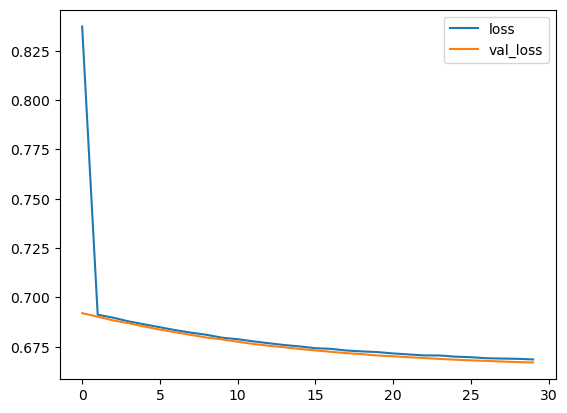

In [26]:
loss_df.plot(kind="line")

In [27]:
predictions=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [32]:
def predict_survival(x,y,ep=30):
    x_train,x_test,y_train,y_test=train_test_split(x,y)
    model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=ep)
    loss_df=pd.DataFrame(model.history.history)
    loss_df.plot(kind="line")
    

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6703 - val_loss: 0.6609
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6643 - val_loss: 0.6606
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6606 - val_loss: 0.6603
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6615 - val_loss: 0.6601
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6694 - val_loss: 0.6600
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6715 - val_loss: 0.6598
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6741 - val_loss: 0.6596
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6674 - val_loss: 0.6594
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6671 - val_loss: 0.6592
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6731 - val_loss: 0.6592
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6650 - val_loss: 0.6589
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6753 - val_l

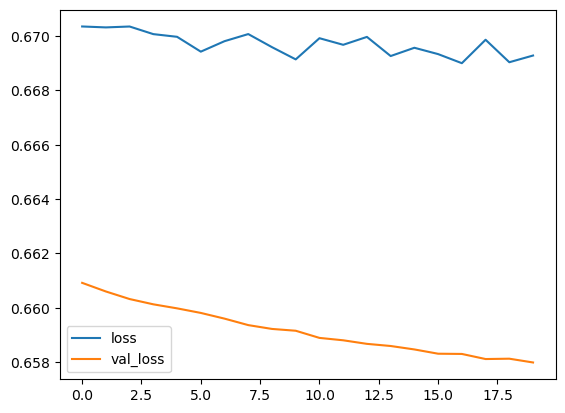

In [33]:
predict_survival(x,y,20)